# 高阶函数

In [1]:
#变量可以指向函数
f=abs
f(-10)

10

#abs=10
#abs(-10)

#把abs指向10后，就无法通过abs(-10)调用该函数了！
#因为abs这个变量已经不指向求绝对值函数而是指向一个整数10！
#当然实际代码绝对不能这么写，这里是为了说明函数名也是变量。要恢复abs函数，请重启Python交互环境。

1.传入函数

In [2]:
def add(x,y,f):
    return f(x)+f(y)
print(add(10,-5,abs))

15


## **map**

我们先看map。map()函数接收两个参数，一个是函数，一个是Iterable，map将传入的函数依次作用到序列的每个元素，并把结果作为新的Iterator返回
 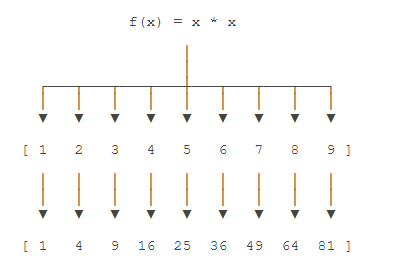

In [1]:
def f(x):
    return x*x
r = map(f, [1, 2, 3, 4, 5, 6, 7, 8, 9])
print(list(r))

[1, 4, 9, 16, 25, 36, 49, 64, 81]


map()传入的第一个参数是f，即函数对象本身。
由于结果r是一个Iterator，Iterator是惰性序列，因此通过list()函数让它把整个序列都计算出来并返回一个list。

In [16]:
#或者用循环不用map
L=[]
for x in [1,2,3,4,5,6,7,8,9]:
    L.append(f(x))
print(L)

[1, 4, 9, 16, 25, 36, 49, 64, 81]


In [19]:
#把这个list所有数字转为字符串
L=list(range(20))
rr=map(str,L)
#由于结果rr是一个Iterator
#Iterator是惰性序列!
#因此通过list()函数让它把整个序列都计算出来并返回一个list
print(list(rr))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']


In [20]:
#简化
list(map(str,[1,2]))

['1', '2']

In [31]:
#如果考虑到字符串str也是一个序列，对上面的例子稍加改动，配合map()，我们就可以写出把str转换为int的函数
from functools import reduce
def fn(x,y):
    return 10*x+y

def char2num(s):
    digits={'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}
    return digits.get(s)#或者用digits[s]

h=map(char2num,'12345')
print(list(h))
r=reduce(fn,map(char2num,'13579'))
print(r)

[1, 2, 3, 4, 5]
13579


In [33]:
#还可以用lambda函数进一步简化成：
from functools import reduce

DIGITS = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}

def char2num(s):
    return DIGITS[s]

def str2int(s):
    return reduce(lambda x, y: x * 10 + y, map(char2num, s))

print(str2int('20190319'))

20190319


**练习**

1. 利用map()函数，把用户输入的不规范的英文名字，变为首字母大写，其他小写的规范名字。   
   输入：['adam', 'LISA', 'barT']，输出：['Adam', 'Lisa', 'Bart']：

In [54]:
def normalize(name):
    ch=name.lower()
    Ch=ch.capitalize()
#     M=[x.lower() for x in name]
#     N=[y.capitalize() for y in M]
    return Ch

# 测试:
L1 = ['adam', 'LISA', 'barT']
# print(normalize(L1))
L2 = list(map(normalize, L1))
print(L2)

['Adam', 'Lisa', 'Bart']


2. Python提供的sum()函数可以接受一个list并求和   
   请编写一个prod()函数，可以接受一个list并利用reduce()求积：

In [52]:
from functools import reduce
def m(x,y):
    return x*y
def prod(L):
    r=reduce(m,L)
    return r
#测试
print('3 * 5 * 7 * 9 =', prod([3, 5, 7, 9]))
if prod([3, 5, 7, 9]) == 945:
    print('测试成功!')
else:
    print('测试失败!')

3 * 5 * 7 * 9 = 945
测试成功!


3. 利用map和reduce编写一个str2float函数，把字符串'123.456'转换成浮点数123.456

In [60]:
s='abcd'
s.index('b')

1

In [9]:
from functools import reduce
def str2float(s):
    def fbig(x,y):
        return 10*x+y
    def fsmall(a,b):
        return 0.1*a+b
    def ch2num(s):
        Character={'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}
        return Character[s]
    aa=s.index('.')#找出小数点的位置
    p1=s[:aa]
    p2=s[-1:aa:-1]#最后一个-1代表倒序
    return reduce(fbig,map(ch2num,p1))+reduce(fsmall,map(ch2num,p2))*0.1

print(str2float('123.321'))

123.321


In [10]:
mmm=[0,1,2,3,4,5,6,7,8,9]
print(mmm[-1:3:-1])#从倒数第一个开始到整数位置3但不包括位置3，倒序

[9, 8, 7, 6, 5, 4]


## **Filter**

和map()类似，filter()也接收一个函数和一个序列。   
和map()不同的是，filter()把传入的函数依次作用于每个元素，然后根据返回值是True还是False决定保留还是丢弃该元素。

In [13]:
def is_odd(x):
    return x%2==1

print(is_odd(1))
print(list(filter(is_odd,[1,2,3,4,5,6,7,8,9])))

True
[1, 3, 5, 7, 9]


In [19]:
s='    a '
s.strip()

'a'